<a href="https://colab.research.google.com/github/chasubeen/ESAA_8th_OB/blob/Week_2/%ED%95%B8%EC%A6%88%EC%98%A8_4%EC%9E%A5_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4-1. 선형 모델**

## **4-1-1. 정규방정식**

In [1]:
## 데이터 생성
# 선형에 비슷하도록 생성

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

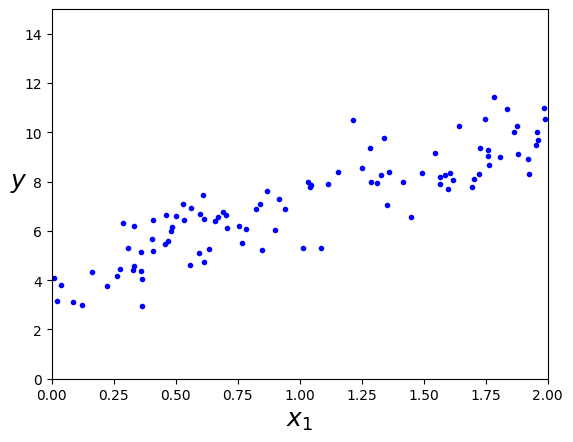

In [2]:
## 데이터 시각화

import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
plt.show()

**식 4-4: 정규 방정식**

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [3]:
## 정규방정식을 통해 파라미터 계산

X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가(bias)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
# 파라미터 확인

theta_best

array([[4.03438991],
       [3.01958628]])

- 사실 해당 데이터를 생성하기 위해 사용한 함수는 $y = 4 + 3 * x_{i} + 가우시안잡음$임
> 예측된 파라미터 값과 실제 값이 매우 비슷함

In [5]:
## 추정된 파라미터로 예측

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.03438991],
       [10.07356246]])

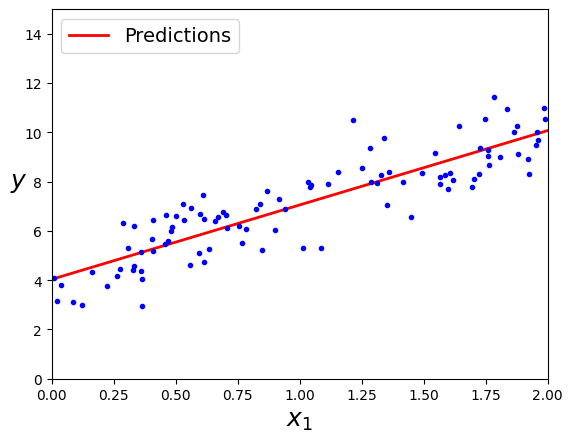

In [6]:
# 예측 시각화

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
## 선형 회귀 수행

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
# 절편 & 회귀 계수 확인
lin_reg.intercept_, lin_reg.coef_

(array([4.03438991]), array([[3.01958628]]))

In [9]:
# 예측
lin_reg.predict(X_new)

array([[ 4.03438991],
       [10.07356246]])

- `LinearRegression` 클래스는 `scipy,linalg,lstsq()` 함수 기반

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.03438991],
       [3.01958628]])

In [11]:
## 유사 역행렬 계산

np.linalg.pinv(X_b).dot(y)

array([[4.03438991],
       [3.01958628]])

# **4-2. 경사 하강법**

## **4-2-1. 배치 경사 하강법**

In [12]:
eta = 0.1  # 학습률
n_iterations = 1000 # 반복 횟수
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [13]:
## 계산된 theta(= parameter) 확인

theta

array([[4.03438991],
       [3.01958628]])

## **4-2-2. 확률적 경사 하강법**

In [14]:
### 파라미터 설정

n_epochs = 50 # 반복 횟수(epoch)
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

In [15]:
## 학습률 조정
def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [16]:
## 최적화 된 파라미터 확인

theta

array([[4.02352091],
       [3.03993824]])

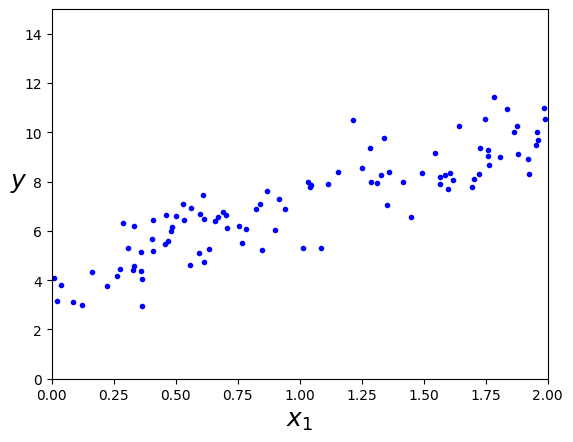

In [17]:
## 시각화

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [18]:
# scikit-learn의 sgd 사용해보기

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None,
                       eta0 = 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [19]:
# 정규방정식으로 얻은 값과 비교

sgd_reg.intercept_, sgd_reg.coef_

(array([4.04396227]), array([3.04321624]))

- 정규방정식과 비슷한 값이 도출됨

## **4-2-3. 미니배치 경사 하강법**

# **4-3. 다항 회귀**

In [20]:
### 비선형 데이터 생성
# 간단한 2차방정식 활용

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

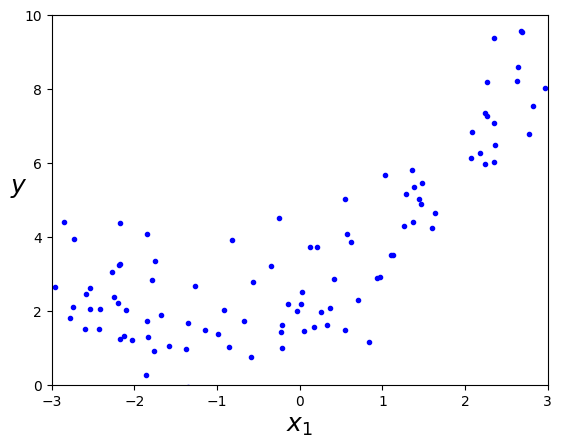

In [21]:
## 시각화

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [22]:
## 데이터 변환
# 사이킷런의 PolynomialFeatures 활용

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.84758336])

In [23]:
X_poly[0] # 제곱

array([-1.84758336,  3.41356428])

In [24]:
### 확장된 모델에 선형 회귀 적용

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.29262012]), array([[1.05494479, 0.44919276]]))

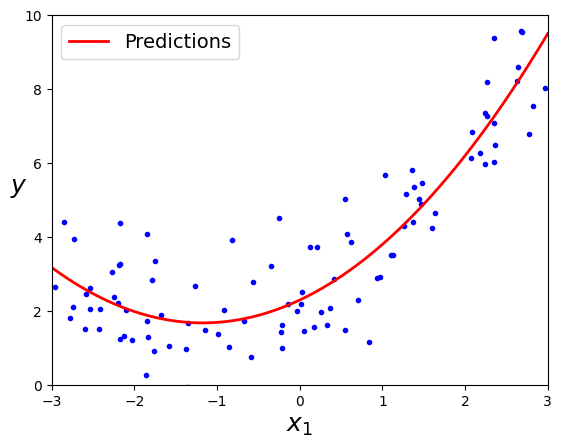

In [25]:
## 시각화

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

- 데이터에 대한 예측이 꽤나 정확함을 확인할 수 있음

# **4-4. 학습 곡선**

In [26]:
### 훈련 데이터에서 모델의 학습 곡선 그리기

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc = "upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

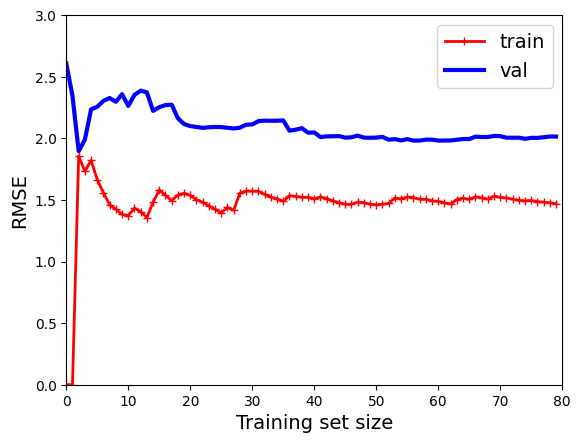

In [27]:
## 단순 선형 회귀 모델의 학습 곡선

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

- 모델이 **과소적합** 됨
  - 훈련 샘플을 더 추가해도 효과가 x

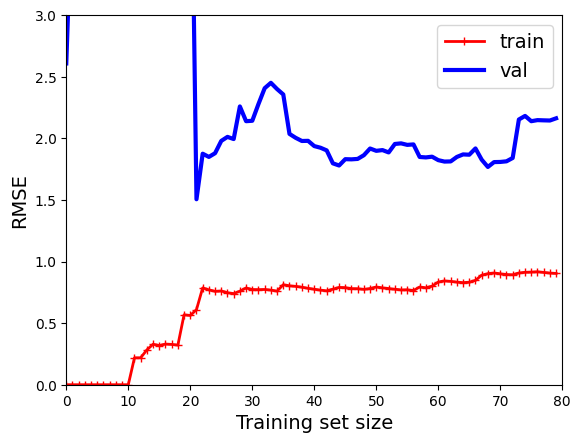

In [28]:
## 10차 다항 회귀 모델의 학습 곡선

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

# **4-5. 규제 선형 모델**

## **4-5-1. 릿지 회귀**

In [29]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky", random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.22993586]])

In [30]:
## 확률적 경사 하강법 적용 시
#solver = 'sag'

ridge_reg = Ridge(alpha = 1, solver = "sag", random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.22884315]])

## **4-5-2. 라쏘 회귀**

In [31]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.18400909])

## **4-5-3. 엘라스틱넷**

In [32]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.18411144])

## **4-5-4. 조기 종료**

In [35]:
# 데이터 생성

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [44]:
## 조기 종료 수행

from sklearn.preprocessing import StandardScaler
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-10, warm_start = True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = deepcopy(sgd_reg)

- `warm_start = True`
  - fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감

# **4-6. 로지스틱 회귀**

### **4-6-3. 결정 경계**

In [45]:
### 데이터 준비

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [46]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

In [47]:
### 모델 훈련

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

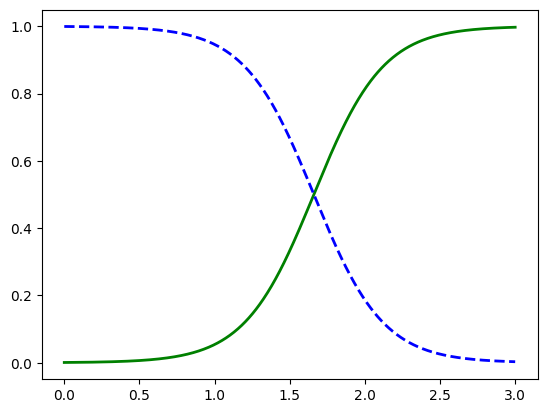

In [48]:
### 모델의 추정 확률 계산

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [49]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## **4-6-4. 소프트맥스 회귀**

In [51]:
### 소프트맥스 회귀 적용해 보기

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [53]:
### 예측
# predict(): 정답 도출

softmax_reg.predict([[5, 2]])

array([2])

In [54]:
# predict_proba(): 해당 클래스에 속할 확률 도출

softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])